In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
import warnings
warnings.filterwarnings("ignore")
import smogn

In [31]:
# import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Total number of duplicate columns :  34


(array([  0.5,  10.5,  20.5,  30.5,  40.5,  50.5,  60.5,  70.5,  80.5,
         90.5, 100.5, 110.5, 120.5, 130.5, 140.5, 150.5, 160.5, 170.5,
        180.5, 190.5, 200.5, 210.5, 220.5, 230.5, 240.5, 250.5, 260.5,
        270.5, 280.5, 290.5, 300.5, 310.5, 320.5, 330.5, 340.5, 350.5,
        360.5, 370.5, 380.5]),
 <a list of 39 Text xticklabel objects>)

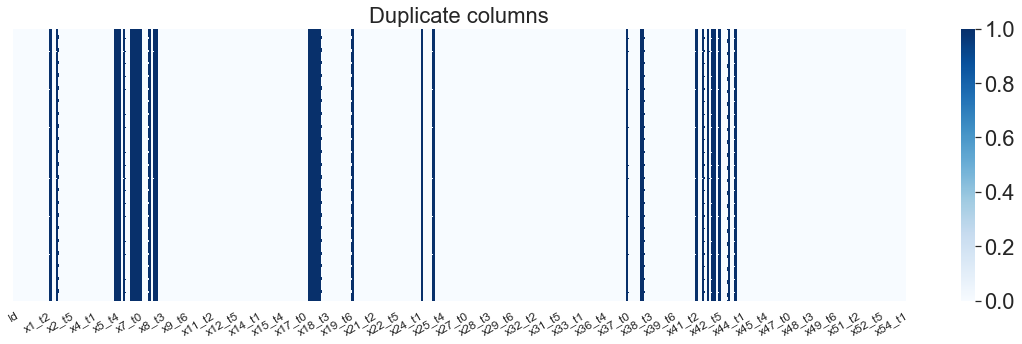

In [32]:
# Find Duplicate columns

train3 = train.copy()
a = train3.columns.tolist()

# Drop duplicate columns
train2 = train3.T.drop_duplicates(keep='first').T
b=train2.columns

print('Total number of duplicate columns : ', (len(a)-len(b)))

# save duplicate columns name
dupp = []
for i in range(len(a)):
    if a[i] not in b:
        dupp.append(a[i])
        
for i in range(len(dupp)):
    train3[dupp[i]] = np.nan

# plot missing values
fig, ax = plt.subplots(figsize=(20,5))
sns.set(font_scale=2)
plt.title('Duplicate columns', fontsize=22)
sns.heatmap(train3.isnull(), cmap="Blues", yticklabels=False, ax=ax)
plt.xticks(fontsize = 12, rotation = 30)

In [33]:
# 0 variance columns
num_zero_var = 0
for i in range(387):
    a = train4[train4.columns[i]].var()
    if a == 0:
        num_zero_var += 1
    
print('Total {} coumns have 0 variance'.format(num_zero_var))

Total 13 coumns have 0 variance


Text(0.5, 1.0, 'Top 15 correlated features with target')

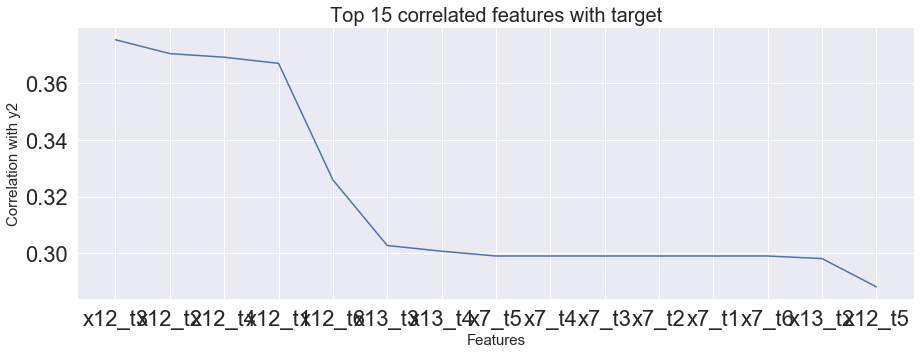

In [34]:
# most correlated features
corr_df = pd.DataFrame({'cols':train.columns[1:-1]})
corr_df['val'] = 0

for i in range(len(train.columns[1:-1])):
    corr_df.iloc[i,1] = (train['y2'].corr(train[train.columns[i]]))
    
corr_df.val = corr_df.val.apply(lambda x : np.abs(x))
corr_df = corr_df.sort_values(by = ['val'],ascending=False).dropna()

plt.figure(figsize = (15,5))
plt.plot(corr_df.cols[:15],corr_df.val[:15])
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Correlation with y2', fontsize = 15)
plt.title('Top 15 correlated features with target', fontsize = 20)

In [35]:
# Find columns average
cols = []
for i in range(1,train.shape[1]-5,7):
    train[train.columns[i]] = (train[train.columns[i]]+train[train.columns[i+1]]+train[train.columns[i+2]]+train[train.columns[i+3]]+train[train.columns[i+4]]+train[train.columns[i+5]]+train[train.columns[i+6]])/7
    cols.append(train.columns[i])

cols.append('Id')
cols.append('y2')


In [36]:
# Drop rest of the columns
train.drop([c for c in train.columns if c not in cols], axis = 1, inplace = True)
train4 = train.copy()

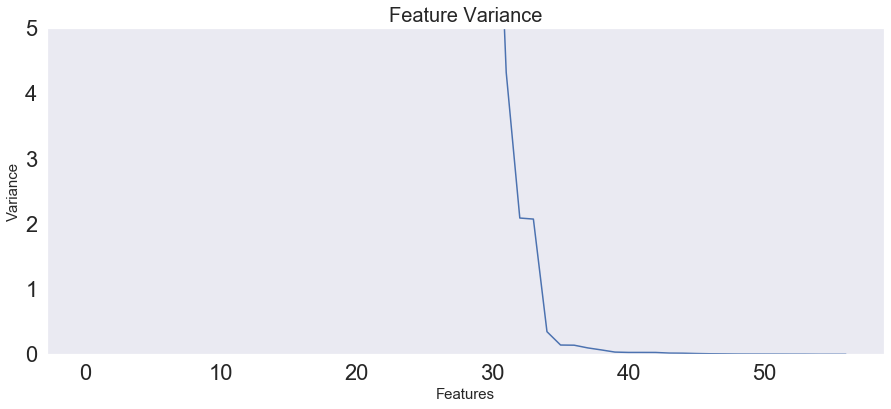

In [37]:
# plot variance
plt.figure(figsize=(15,6))
plt.plot(range(57),train.var().sort_values(ascending=False))
plt.ylim(0,5)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Variance', fontsize = 15)
plt.title('Feature Variance', fontsize = 20)
plt.grid()

In [38]:
train4

Id       x0_t0     x1_t0  x2_t0      x3_t0     x4_t0       x5_t0  \
0    706  760.244080  0.937269    1.0  22.056471  6.728571  748.549404   
1    239  757.366380  1.379567    1.0  26.895488  6.500000  749.596987   
2    613  757.052327  0.864291    1.0  22.271551  6.900000  820.260866   
3    588  760.571769  0.808450    1.0  28.319341  6.900000  753.283047   
4    780  768.801759  0.822851    1.0  19.236735  6.814286  760.840050   
..   ...         ...       ...    ...        ...       ...         ...   
789  835  766.069784  0.832278    1.0  21.072290  6.557143  726.338241   
790  192  765.594878  0.691425    1.0  26.742755  6.557143  750.907462   
791  629  745.048053  0.935202    1.0  22.344123  6.900000  742.445135   
792  559  749.796813  0.045067    1.0  17.101026  6.900000  750.949348   
793  684  751.815084  0.862552    1.0  27.493094  6.728571  752.122507   

          x6_t0       x7_t0     x8_t0  ...     x46_t0    x47_t0      x48_t0  \
0    789.804275  811.182847  4.400000  ...  85.856746  0.857143  700.196065   
1    845.599976  840.799988  4.500000  ...  84.719534  0.928571  547.953130   
2    793.147153  815.468561  4.400000  ...  91.578217  0.571429  547.210846   
3    793.147153  815.468561  4.400000  ...  89.831031  0.857143  630.162187   
4    775.918551  766.868551  4.400000  ...  88.506798  0.714286  497.926779   
..          ...         ...       ...  ...        ...       ...         ...   
789  786.375704  807.240010  4.400000  ...  89.587603  0.857143  622.162993   
790  838.489979  837.325704  4.485714  ...  87.083778  0.857143  597.519090   
791  793.147153  815.468561  4.400000  ...  90.284421  0.928571  702.892035   
792  781.599976  765.000000  4.400000  ...  89.586280  0.928571  555.567642   
793  789.804275  811.182847  4.400000  ...  86.412050  0.857143  551.687924   

         x49_t0     x50_t0      x51_t0      x52_t0     x53_t0    x54_t0    y2  
0    119.060403  14.758329  878.637498  646.594635  89.693307  1.892407  0.72  
1    132.105129  19.044833  886.672018  712.281086  74.327068  1.913206  0.62  
2    109.675539  13.939582  861.906494  676.498573  87.959533  2.052945  0.57  
3    137.102413  14.898321  871.835244  653.640959  88.314801  1.940227  1.01  
4     91.554997  14.059461  855.777351  640.448159  87.042743  2.248662 -0.42  
..          ...        ...         ...         ...        ...       ...   ...  
789  140.485585  14.213020  850.213475  634.735863  80.177073  1.994777  0.59  
790  147.143232  19.263018  851.957988  717.884076  80.517546  1.793212  0.60  
791  116.409453  15.872023  882.130038  688.007223  89.149713  2.022265  0.58  
792  139.342769  12.715452  862.475908  663.617297  89.281425  1.915521  0.43  
793  134.356184  15.093108  908.943613  673.231750  92.359777  1.989627  0.59  

[794 rows x 57 columns]

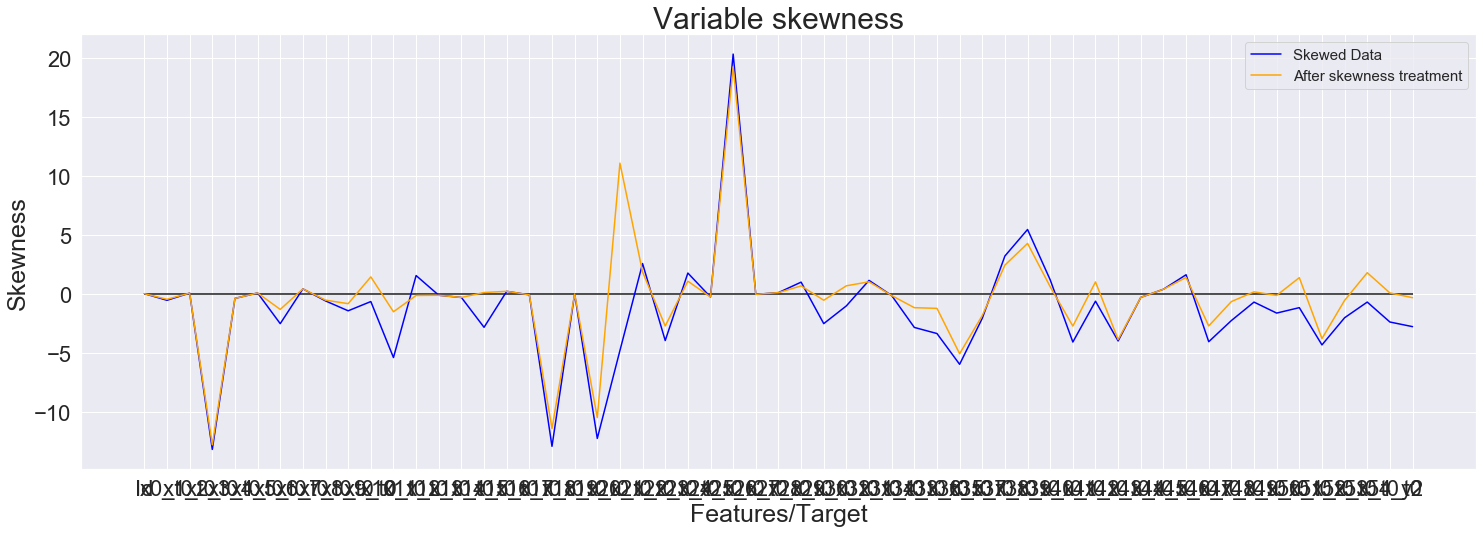

In [39]:
# skewness treat
plt.figure(figsize = (25,8))
plt.plot(train4.skew(), color = 'blue', label = 'Skewed Data')

memo = []
for i in range(len(train4.skew())):
    if train4.skew()[i] > 0.5:
        train4[train4.skew().index[i]] = train4[train4.skew().index[i]].apply(lambda x : np.log1p(x))
        memo.append(1)
    elif train4.skew()[i] < -0.5:
        train4[train4.skew().index[i]] = train4[train4.skew().index[i]].apply(lambda x :x*x*x)
        memo.append(-1)
    else:
        memo.append(0)
        
plt.plot(train4.skew(), color = 'orange', label = 'After skewness treatment')
plt.hlines(0,0,56)
plt.legend(prop={'size': 15})
plt.xlabel('Features/Target', fontsize = 25)
plt.ylabel('Skewness', fontsize = 25)
plt.title('Variable skewness', fontsize = 30)
plt.show()

In [282]:
# split predictors and target
X = train.drop('y2',axis = 1)
y = train['y2'].copy()

# Standardize independent variables
ss = StandardScaler()
X = ss.fit_transform(X)

Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.


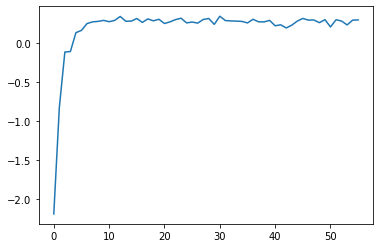

In [283]:
# rfecv
rfe_estimator = RandomForestRegressor()
rfecv_1 = RFECV(rfe_estimator, step=1, min_features_to_select=1, scoring='r2', verbose=12, n_jobs=-1)
rfecv_1.fit(X,y)
X_rfe = rfecv_1.transform(X)
plt.plot(rfecv_1.grid_scores_[:])

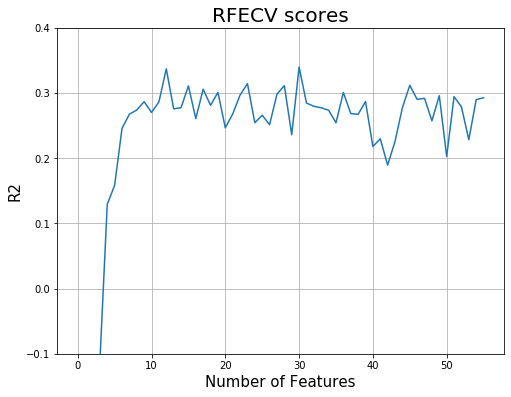

In [284]:
# plot r2 score vs number of features selected by rfecv
plt.figure(figsize=(8,6))
plt.plot(rfecv_1.grid_scores_[:])
plt.xlabel('Number of Features', fontsize = 15)
plt.ylabel('R2', fontsize = 15)
plt.title('RFECV scores', fontsize = 20)
plt.ylim(-0.1,0.4)
plt.grid()
plt.show()

In [285]:
# Linear Regression
lr = LinearRegression()
l1 = Lasso()
l2 = Ridge()
svr = SVR(kernel='linear')
rf = RandomForestRegressor(n_jobs = -1)
xgb = XGBRegressor()

lr_cv = cross_val_score(lr, X_rfe,y, scoring = 'r2', cv = 5, n_jobs = -1).mean()
print(lr_cv)
l1_cv = cross_val_score(l1, X_rfe,y, scoring = 'r2', cv = 5, n_jobs = -1).mean()
print(l1_cv)
l2_cv = cross_val_score(l2, X_rfe,y, scoring = 'r2', cv = 5, n_jobs = -1).mean()
print(l2_cv)
svr_cv = cross_val_score(svr, X_rfe,y, scoring = 'r2', cv = 5, n_jobs = -1).mean()
print(svr_cv)
rf_cv = cross_val_score(rf, X_rfe,y, scoring = 'r2', cv = 8, n_jobs = -1).mean()
print(rf_cv)
xgb_cv = cross_val_score(xgb, X_rfe,y, scoring = 'r2', cv = 8, n_jobs = -1).mean()
print(xgb_cv)

-0.05733308740278422
-0.003529473527464777
-0.05455645477514561
0.13862013386025523
0.3260194710157113
-1.0540247493320907


In [272]:
# Model Stacking 
estimators = [
     ('lr', LinearRegression()),('l1', Lasso()),('l2', Ridge()),
     ('svr', SVR(kernel='linear')),('rf', RandomForestRegressor(n_jobs = -1)),('xgb', XGBRegressor())
]
sreg = StackingRegressor(estimators=estimators,
                         final_estimator=Ridge())
stk_cv = cross_val_score(sreg, X_rfe,y, scoring = 'r2', cv = 5, n_jobs = -1).mean()
print(stk_cv)

0.38676698293137607


In [306]:
# Over-sampling
train_smogn = smogn.smoter(data = train,y = "y2")

r_index: 100%|########################################################################| 82/82 [00:00<00:00, 122.61it/s]


In [307]:
print('Shape of training data after over-sampling ',train_smogn.shape, ' whereas original train data shape = ', train.shape)

Shape of training data after over-sampling  (856, 57)  whereas original train data shape =  (794, 57)


In [308]:
# split over sampled data
Xs = train_smogn.drop('y2',axis = 1)
ys = train_smogn['y2'].copy()

# Standardize
sss = StandardScaler()
Xs = sss.fit_transform(Xs)

Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 fe

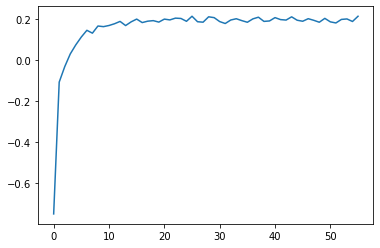

In [309]:
# RFECV for over-sampled data
rfe_estimators = RandomForestRegressor()
rfecv_1s = RFECV(rfe_estimators, step=1, min_features_to_select=1, scoring='r2', verbose=12, n_jobs=-1)
rfecv_1s.fit(Xs,ys)
X_rfes = rfecv_1s.transform(Xs)
plt.plot(rfecv_1s.grid_scores_[:])

In [315]:
# Cross validating Vanilla models
lr = LinearRegression()
l1 = Lasso()
l2 = Ridge()
svr = SVR(kernel='linear')
rf = RandomForestRegressor(n_jobs = -1)
xgb = XGBRegressor()

lrs_cv = cross_val_score(lr, X_rfes,ys, scoring = 'r2', cv = 5, n_jobs = -1).mean()
print(lrs_cv)
l1s_cv = cross_val_score(l1, X_rfes,ys, scoring = 'r2', cv = 5, n_jobs = -1).mean()
print(l1s_cv)
l2s_cv = cross_val_score(l2, X_rfes,ys, scoring = 'r2', cv = 5, n_jobs = -1).mean()
print(l2s_cv)
svrs_cv = cross_val_score(svr, X_rfes,ys, scoring = 'r2', cv = 5, n_jobs = -1).mean()
print(svrs_cv)
rfs_cv = cross_val_score(rf, X_rfes,ys, scoring = 'r2', cv = 8, n_jobs = -1).mean()
print(rfs_cv)
xgbs_cv = cross_val_score(xgb, X_rfes,ys, scoring = 'r2', cv = 8, n_jobs = -1).mean()
print(xgbs_cv)

-0.23834303489446645
-1.1738707416939487
-0.23860836035254995
-0.21826536407922742
0.29710089016518787
0.2547057471385854


'-0.8039721344501704\n-1.1738707416939487\n-0.6005382250844837\n-0.8291626951165328\n0.2929811403681152\n0.2435881583956529'

In [351]:
# xgb hyper-parameter tuning
grid = {
    'max_depth' : [6],'min_child_weight' : [1],
    'n_estimators' : [1000],
    'gamma' : [0],
    'subsample':[0.95],'colsample_bytree':[0.85],
    'reg_alpha':[0.1],
    'learning_rate' : [0.15]
}
gs1 = GridSearchCV(XGBRegressor(), grid, n_jobs=-1, verbose=2,scoring='r2',return_train_score=True)
gs1.fit(X_rfes,ys)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:  2.6min finished


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.85], 'gamma': [0],
       

In [352]:
# print best tuning scores & parameters
print(gs1.best_params_)
print(gs1.best_score_)
print(gs1.cv_results_['mean_train_score'].mean())

{'colsample_bytree': 0.85, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 1000, 'reg_alpha': 0.1, 'subsample': 0.95}
0.3080227167557553
0.9933389868999699


In [354]:
# best model
xgb_ht = XGBRegressor(max_depth = 6, colsample_bytree = 0.85, gamma = 0, learning_rate = 0.15,
                      min_child_weight = 1, n_estimators = 1000, reg_alpha = 0.1, subsample = 0.95)
xgb_ht.fit(X_rfes,ys)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.85, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=0.95,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [463]:
# stacking regressor
estimators = [
     ('lr', LinearRegression()),('l1', Lasso()),('l2', Ridge()),
     ('svr', SVR(kernel='linear')),('rf', RandomForestRegressor(n_jobs = -1)),('xgb', xgb_ht)
]
sreg = StackingRegressor(estimators=estimators,
                         final_estimator=Ridge())
stk_cv = cross_val_score(sreg, X_rfes,ys, scoring = 'r2', cv = 5, n_jobs = -1)
print(stk_cv)

[-0.58405894  0.43541261  0.47832516  0.47743081  0.39254113]


In [318]:
# test data
id_ = test['Id']
cols2 = []
for i in range(1,test.shape[1]-5,7):
    test[test.columns[i]] = (test[test.columns[i]]+test[test.columns[i+1]]+test[test.columns[i+2]]+test[test.columns[i+3]]+
                             test[test.columns[i+4]]+test[test.columns[i+5]]+test[test.columns[i+6]])/7
    cols2.append(test.columns[i])

cols2.append('Id')

test.drop([c for c in test.columns if c not in cols2], axis = 1, inplace = True)
        
test = sss.transform(test)
test = rfecv_1s.transform(test)

In [403]:
# predict and export data
pred_ = model_test.predict(test)
sub = pd.DataFrame({'Id':id_,'y2':pred_})
sub.to_csv('sub.csv',index = False)

In [464]:
# Further evaluation of model
xtrain,xtest,ytrain,ytest = train_test_split(X_rfes,ys,test_size = 0.2, shuffle = True,random_state = 193)
model_test = XGBRegressor()
pred = sreg.fit(xtrain,ytrain).predict(xtest)
r2 = r2_score(ytest,pred)
print(r2)

0.7866795713044002


In [413]:
plt_df = pd.DataFrame({'ytest':ytest,'pred':pred})
plt_df

ytest      pred
5    0.715044  0.950255
316  0.740000  0.720377
508  0.600000  0.548806
68   0.812597  0.824442
3    1.010000  0.868804
..        ...       ...
194  0.450000  0.524228
123  0.230370  0.252012
90   0.365998  0.333310
67   0.764867  0.841115
422  0.720000  0.702981

[172 rows x 2 columns]

In [465]:
# model performance
# MAE
mae = round(mean_absolute_error(ytest, pred),4)

# RMSE
rmse = round(np.sqrt(mean_squared_error(ytest, pred)),4)

# RMSLE
rmsle = round(np.sqrt(np.mean((np.log1p(pred) - np.log1p(ytest))**2)),4)

# R-Squared
r2 = round(r2_score(ytest, pred),4)

print(mae,rmse,rmsle,r2)

0.0857 0.1118 0.076 0.7867


Text(0.5, 1.0, 'Model performance')

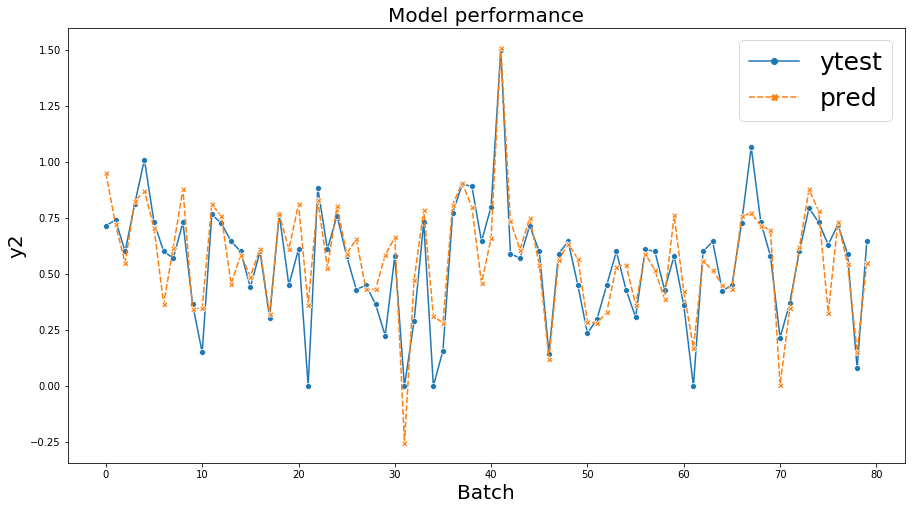

In [460]:
plt.figure(figsize=(15,8))
sns.lineplot(data=plt_df.reset_index().drop('index',axis=1).iloc[:80,:],style="event",markers=True)
plt.xlabel('Batch', fontsize = 20)
plt.ylabel('y2', fontsize = 20)
plt.legend(prop={'size': 25})
plt.title('Model performance', fontsize=20)